In [69]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import pylab as pl
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
digits = load_digits()
%pylab inline
pl.gray()

Populating the interactive namespace from numpy and matplotlib


In [10]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

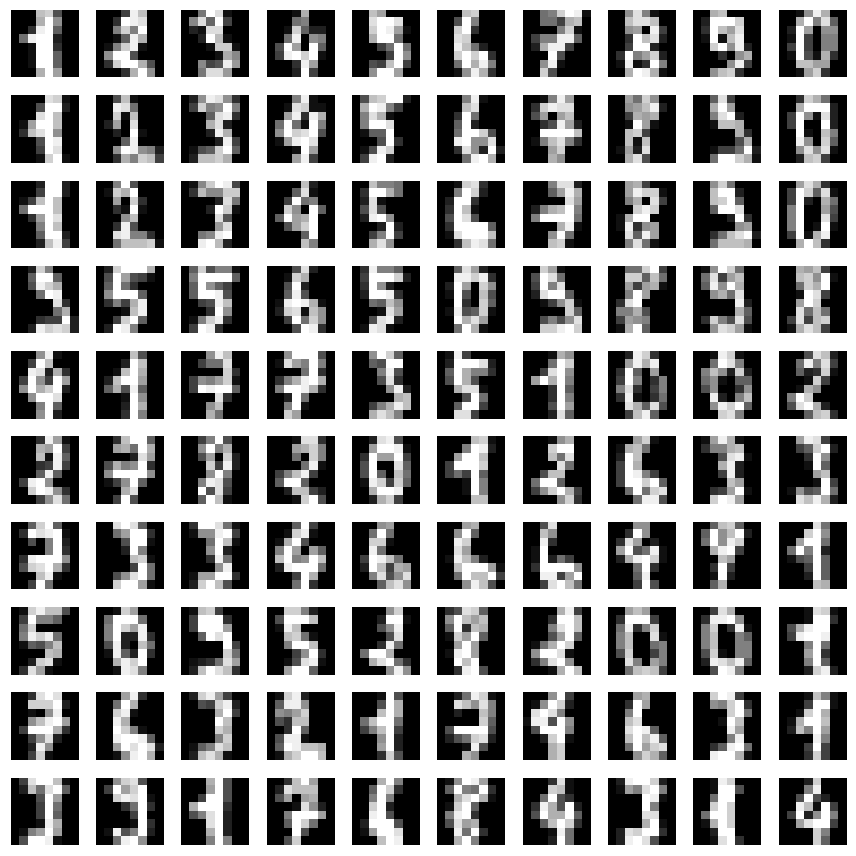

In [32]:
fig, axs = plt.subplots(10, 10, figsize=(12, 12))
for i in range(1,101):
    pl.subplot(10,10,i)
    pl.imshow(digits.images[i])
    pl.xticks([])
    pl.yticks([])
    pl.axis('off')
fig.tight_layout()

In [46]:
digits = load_digits(n_class = 6)
len(digits.images)

1083

In [54]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(digits.data)
pca = PCA(n_components=10)
pca_data = pca.fit_transform(scaled_data)


10

In [60]:
def scree_plot(pca, title=None):
    num_components = pca.n_components_
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    plt.figure(figsize=(10, 6), dpi=250)
    ax = plt.subplot(111)
    ax.bar(ind, vals, 0.35,
           color=[(0.949, 0.718, 0.004),
                  (0.898, 0.49, 0.016),
                  (0.863, 0, 0.188),
                  (0.694, 0, 0.345),
                  (0.486, 0.216, 0.541),
                  (0.204, 0.396, 0.667),
                  (0.035, 0.635, 0.459),
                  (0.486, 0.722, 0.329),
                 ])

    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)

    ax.set_xticklabels(ind,
                       fontsize=12)

    ax.set_ylim(0, max(vals)+0.05)
    ax.set_xlim(0-0.45, 8+0.45)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)

    if title is not None:
        plt.title(title, fontsize=16)

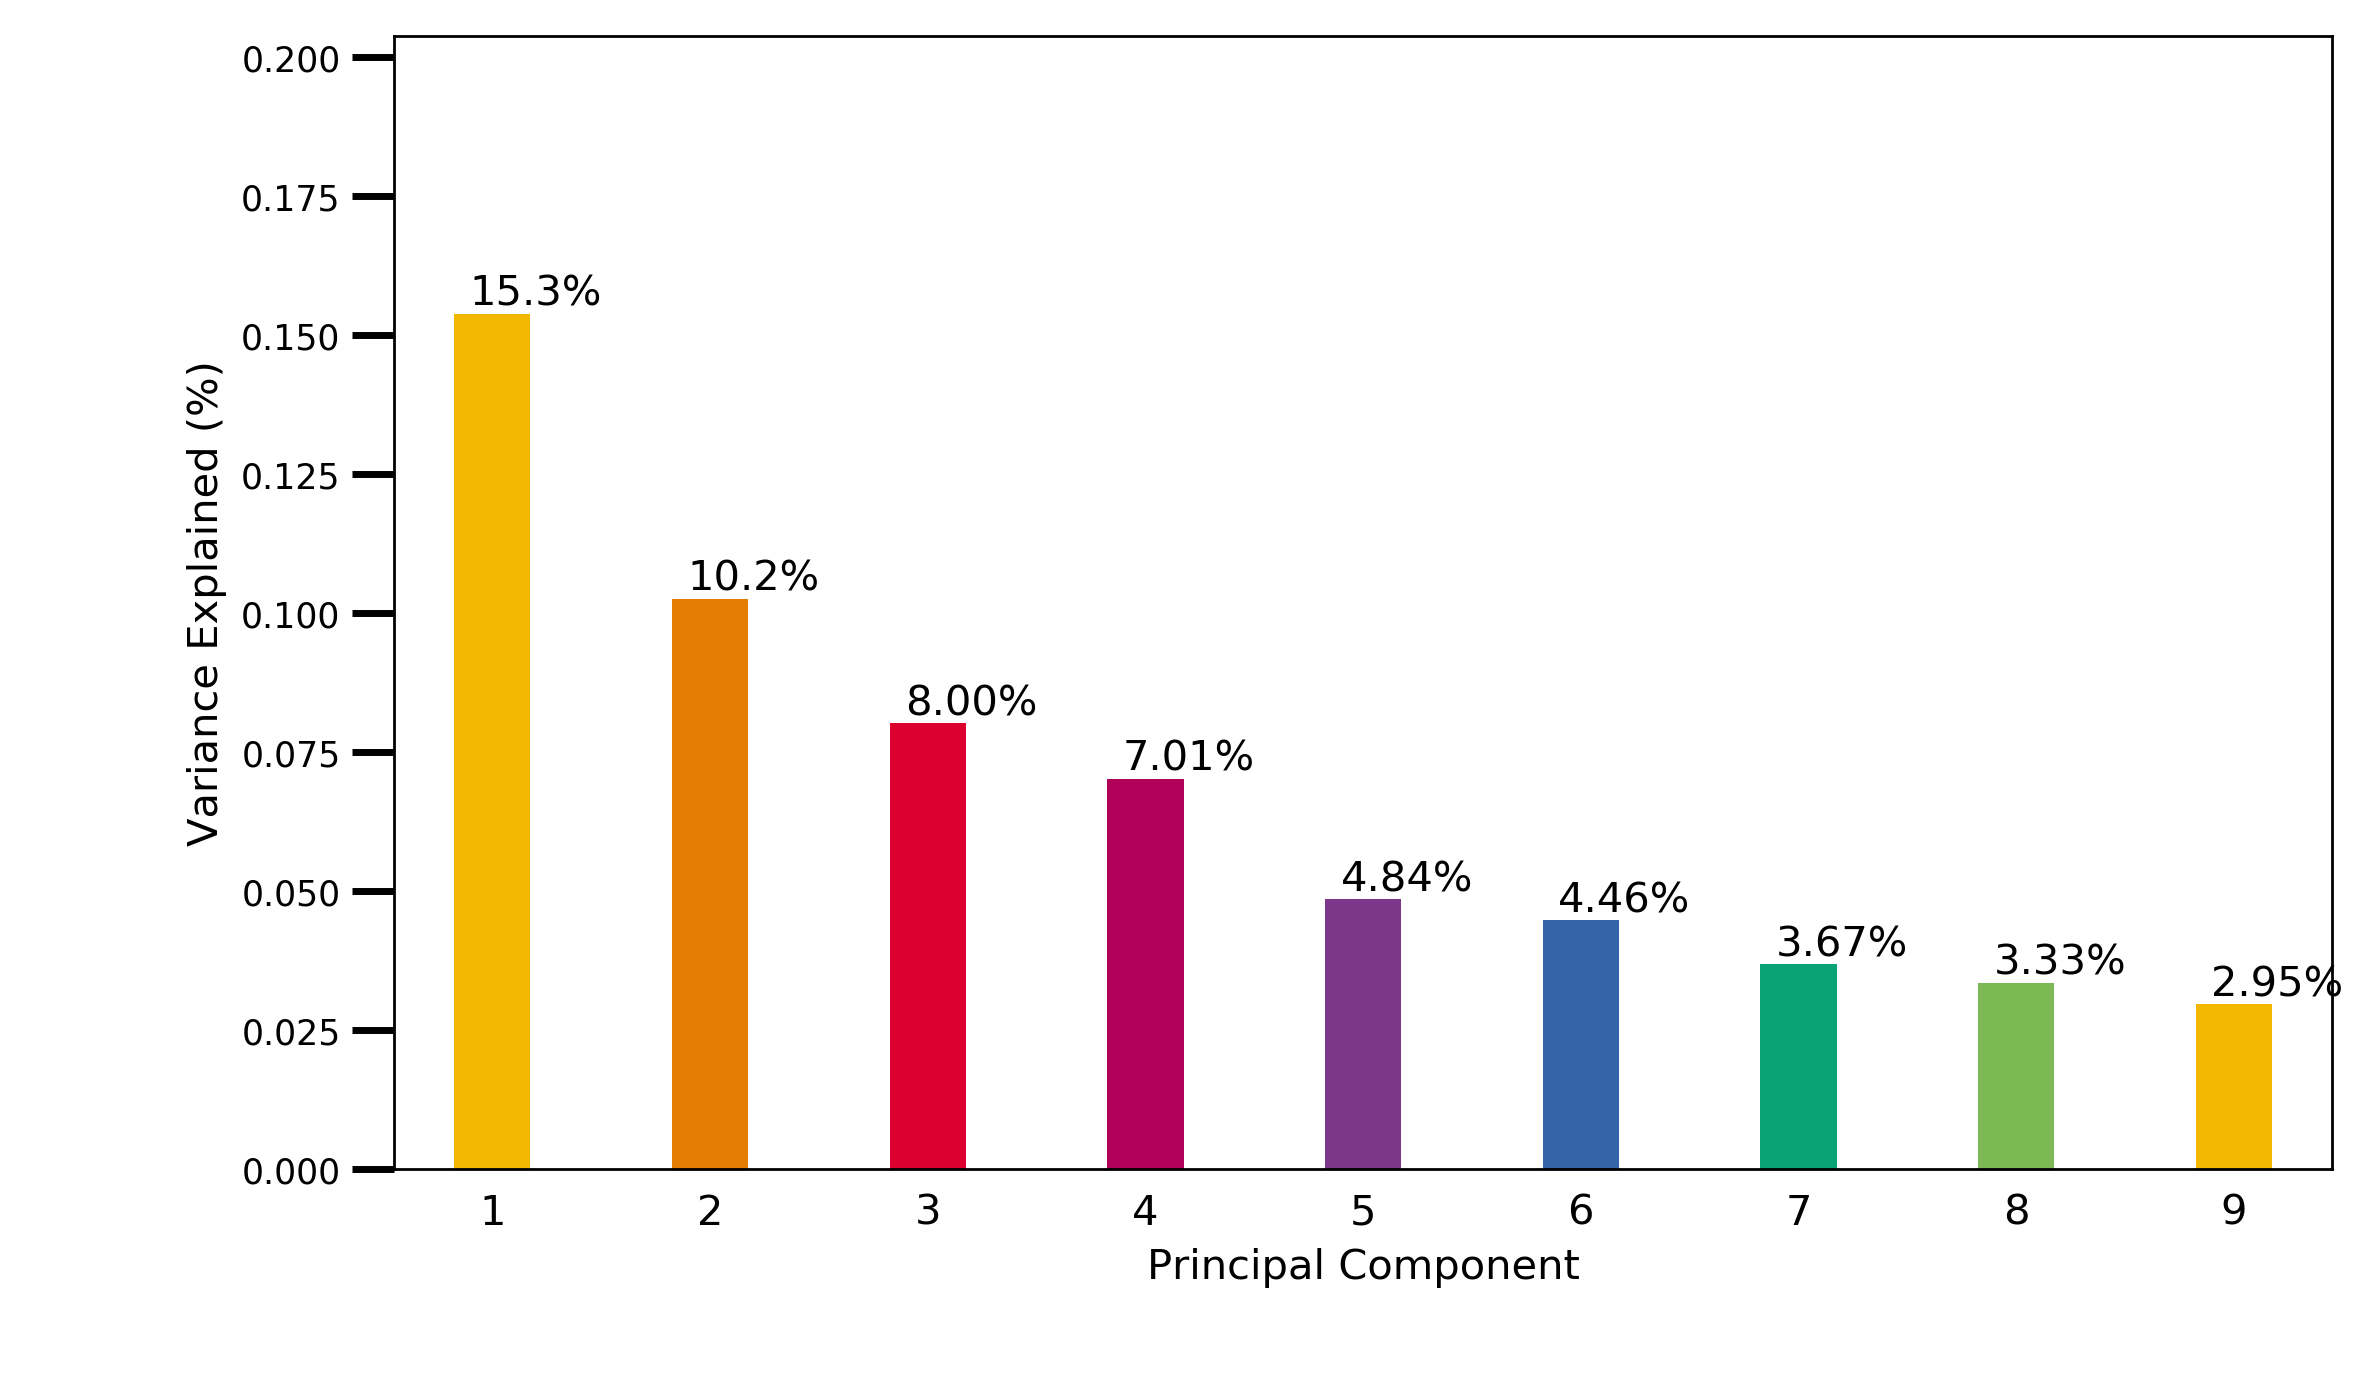

In [62]:
scree_plot(pca)

In [66]:
def plot_embedding(X, y, title=None):
    '''
    INPUT:
    X - decomposed feature matrix
    y - target labels (digits)

    Creates a pyplot object showing digits projected onto 2-dimensional
    feature space. PCA should be performed on the feature matrix before 
    passing it to plot_embedding.

    '''
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 6), dpi=250)
    ax = plt.subplot(111)
    ax.axis('off')
    ax.patch.set_visible(False)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 12})

    plt.xticks([]), plt.yticks([])
    plt.ylim([-0.1,1.1])
    plt.xlim([-0.1,1.1])

    if title is not None:
        plt.title(title, fontsize=16)

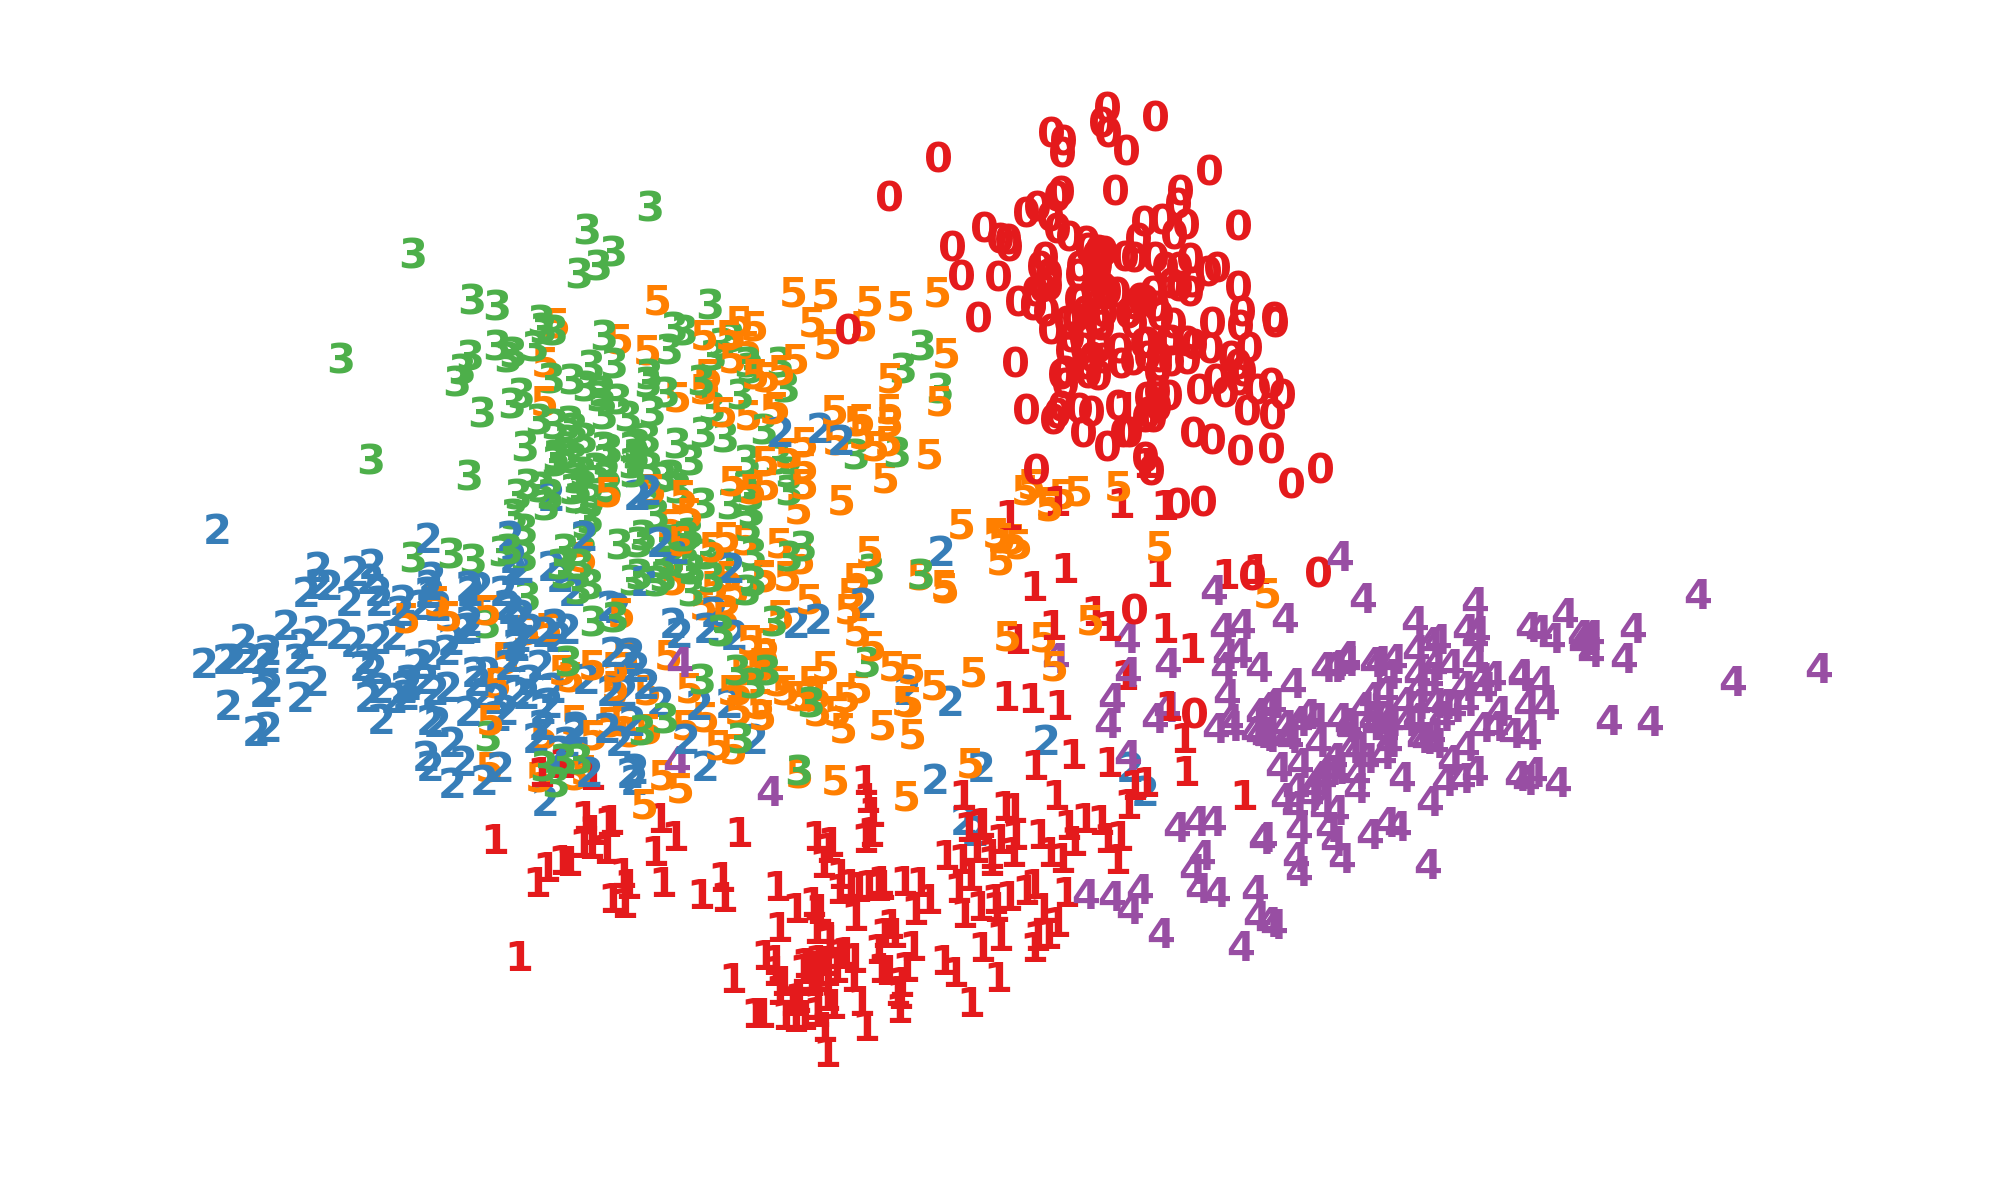

In [67]:
plot_embedding(pca_data, digits.target)

In [78]:
cars = pd.read_table('data/cars.tsv', header=None)
new_df = pd.concat([pd.DataFrame(cars.iloc[:,0].str.split().tolist()),
                    pd.DataFrame(cars.iloc[:,1])], axis=1, ignore_index=True)
car_df = new_df[new_df[3] != '?'].iloc[:,:8]
car_df.columns = ['mpg', 'cylinders','displacement','horsepower','weight','acceleration','model_year', 'origin']
float_df = car_df.convert_objects(convert_numeric=True)
float_df.head()

/home/jesse/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [79]:
del float_df['origin']
y = float_df['mpg'].copy()
temp = float_df.copy()
del temp['mpg']
X = temp.as_matrix()

In [84]:
scaler1 = StandardScaler()
scaled_data1 = scaler1.fit_transform(X)
pca1 = PCA(n_components=6)
pca_data1 = pca1.fit_transform(scaled_data1)

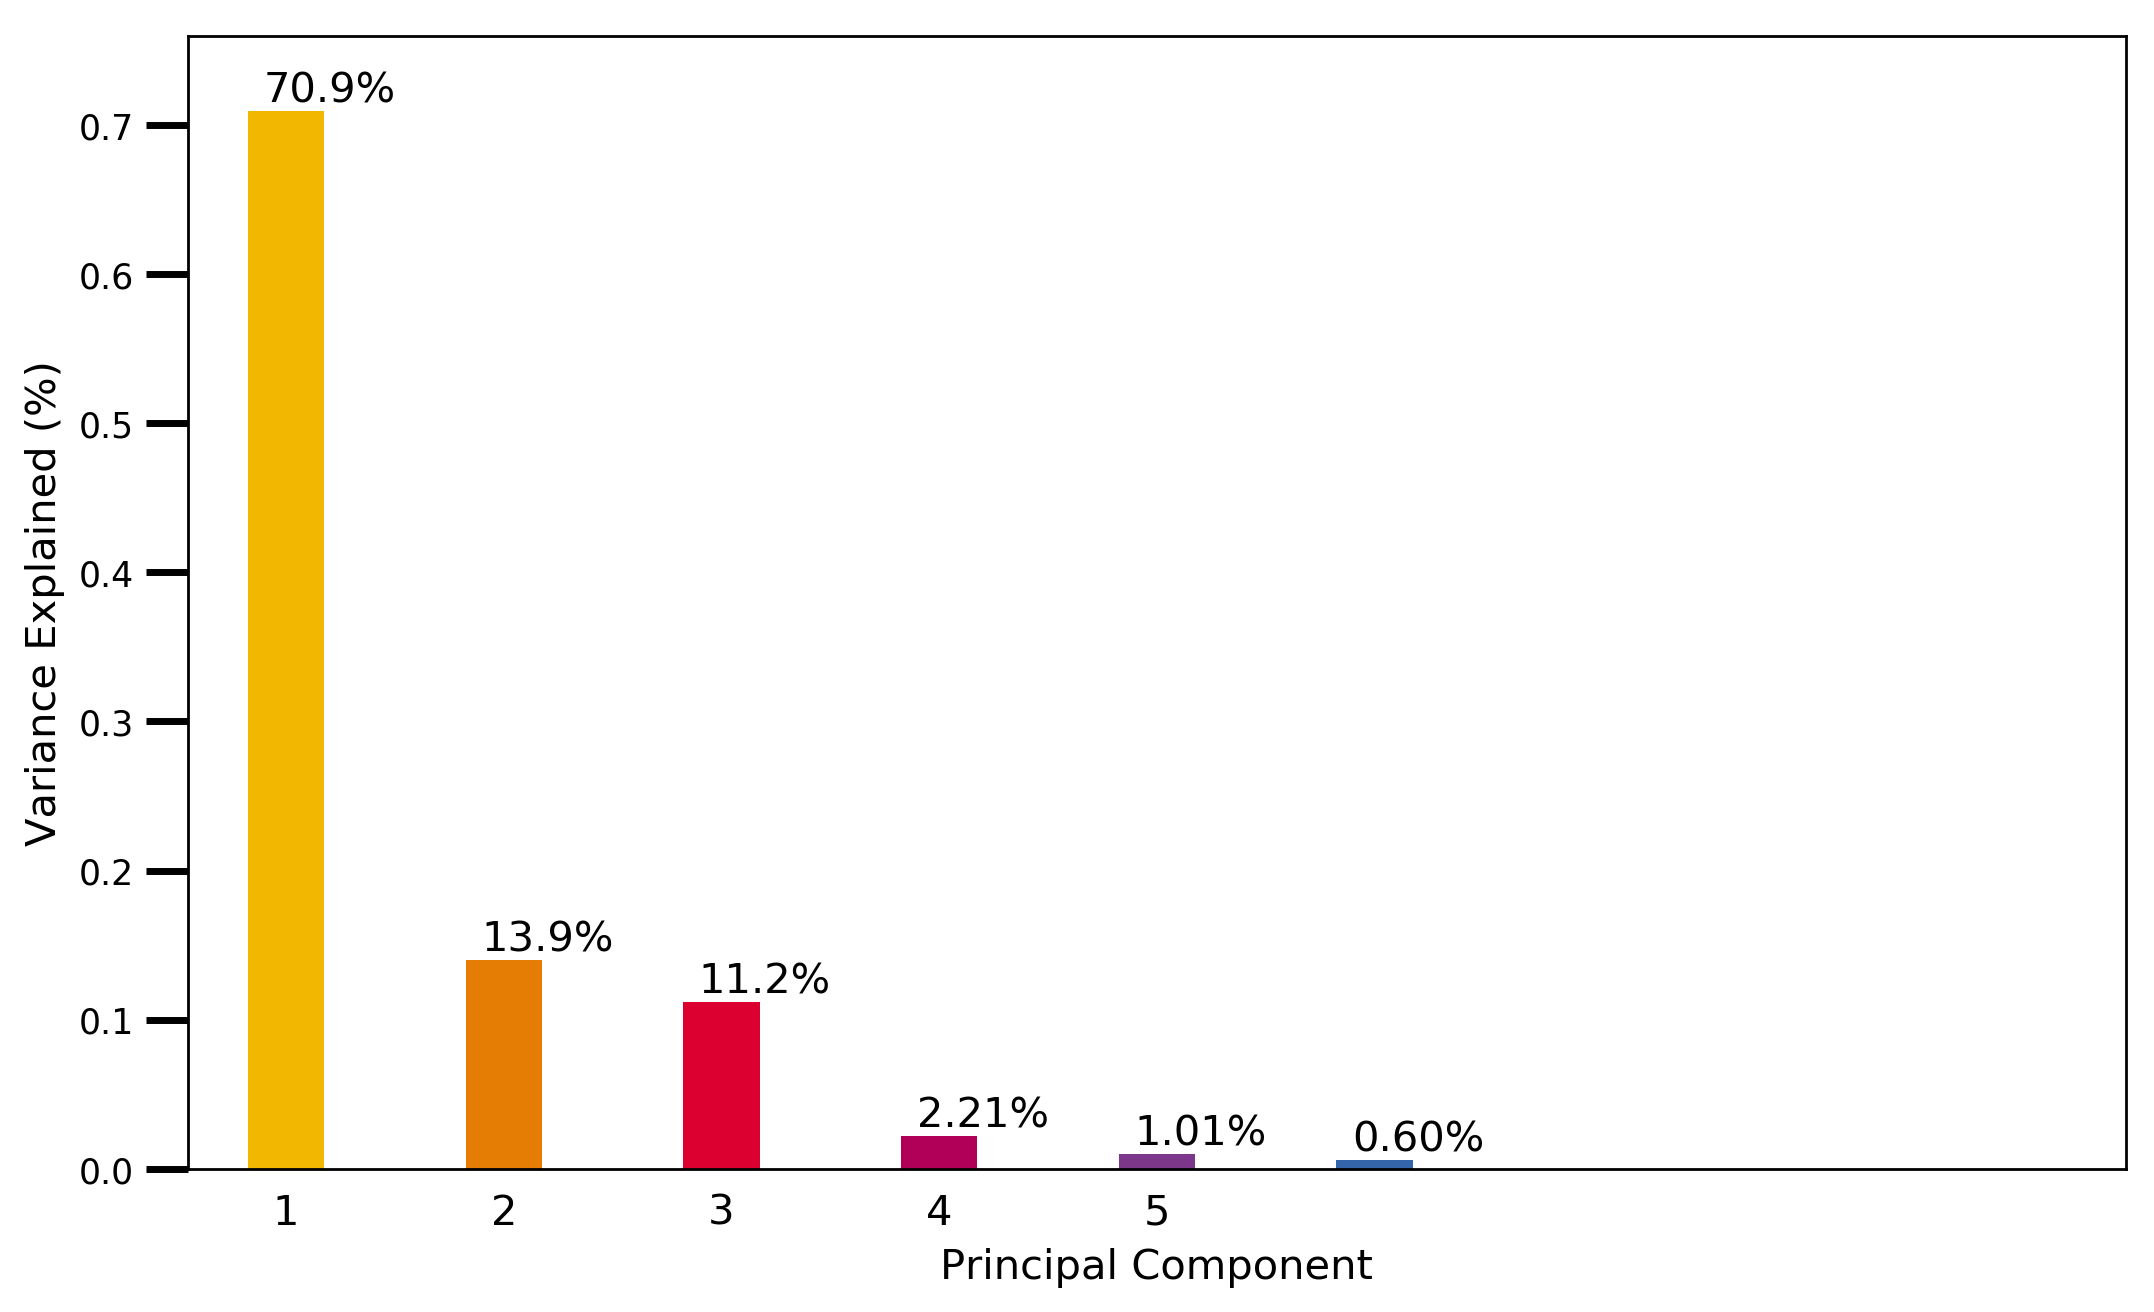

In [85]:
scree_plot(pca1)

In [ ]:
mod